# Importing necessary libraries.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data Augmentation

In [2]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

# Splitting the data for training & validation

In [3]:
train = training_datagenarator.flow_from_directory(r'C:\Users\bhaga\Downloads\hacka\wildfire_data\Datasets\Training',
                                                   target_size=(224, 224), color_mode='rgb',
                                                   class_mode='categorical', batch_size=batch_size, subset='training')

validation = training_datagenarator.flow_from_directory(r'C:\Users\bhaga\Downloads\hacka\wildfire_data\Datasets\Training',
                                                        target_size=(224, 224), color_mode='rgb',
                                                        class_mode='categorical', batch_size=batch_size, subset='validation')

Found 13282 images belonging to 3 classes.
Found 1475 images belonging to 3 classes.


# Initializing & Creating layers

In [8]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [9]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [10]:
checkpoint=tf.keras.callbacks.ModelCheckpoint('models/fire-smoke-normal.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [11]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=2,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=[callbacks, early_stopping] 
                 )

830/830 [==============================] - ETA: 0s - loss: 0.2198 - accuracy: 0.9218

c:\Users\bhaga\anaconda3\envs\time_series_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


830/830 [==============================] - 2199s 3s/step - loss: 0.2198 - accuracy: 0.9218 - val_loss: 0.1876 - val_accuracy: 0.9457


In [15]:
from tensorflow.keras.models import load_model
cnn=load_model('models\fire-smoke-normal.h5')

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

1/1 [==============================] - 0s 119ms/step


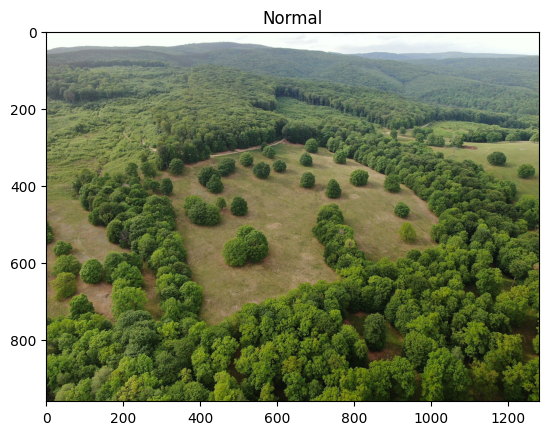

In [20]:
image_for_testing=r'C:\D Drive\Admin\Hackathon\Codes\wildfire_data\Datasets\Test\1.jpg'
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
result = np.argmax(result, axis=1)[0]
Categories=['Fire', 'Normal', 'Smoke']
image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Categories[result])
plt.show()